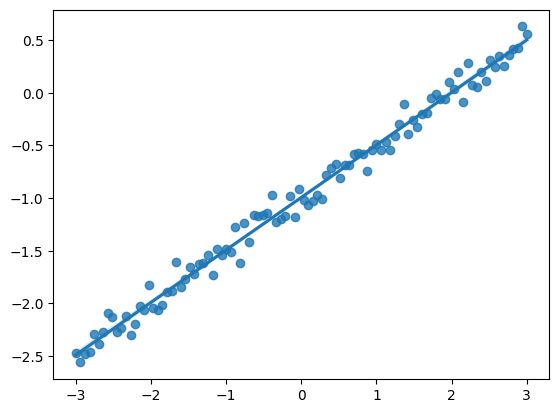

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set random seed for consistency 
np.random.seed(43)
plt.style.use('default') 

#Generate random noise for plotting
x = np.linspace(-3, 3, 100)
y = x * .5 - 1 + np.random.randn(100) * .1

#plot regression line
sns.regplot(x=x,y=y);


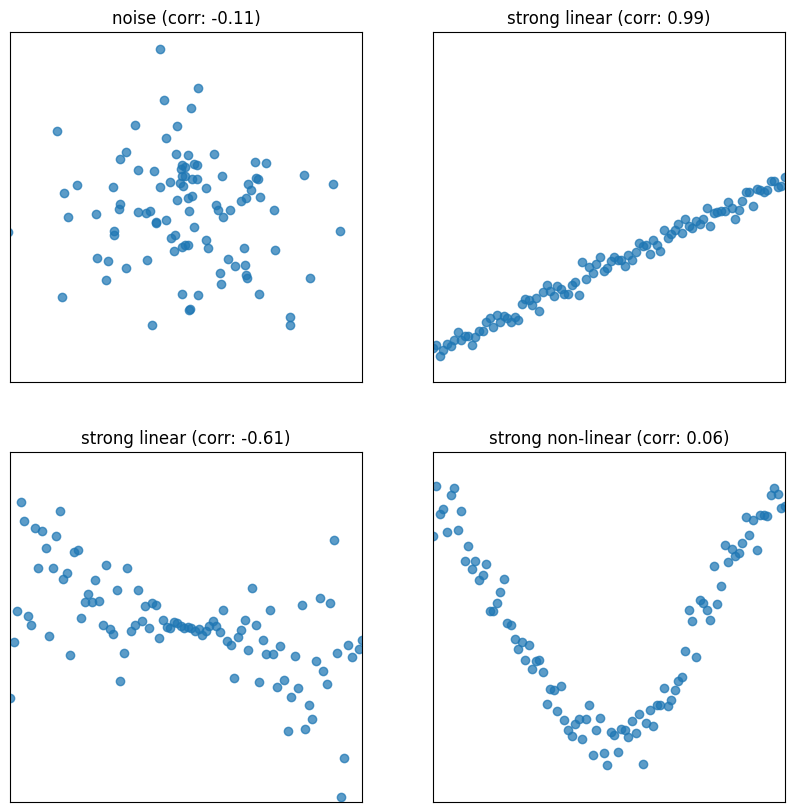

In [2]:
def plot_and_get_corr(ax, x, y, title):
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(x, y, alpha = 0.73)
    r = np.corrcoef(x, y)[0, 1]
    ax.set_title(title + " (corr: {})".format(r.round(2)))
    return r

fig, axs = plt.subplots(2, 2, figsize = (10, 10))

# Just noise
x1, y1 = np.random.randn(2, 100)
corr1 = plot_and_get_corr(axs[0, 0], x1, y1, title = "noise")

# Strong linear
x2 = np.linspace(-3, 3, 100)
y2 = x2 * 0.5 - 1 + np.random.randn(100) * 0.1
corr2 = plot_and_get_corr(axs[0, 1], x2, y2, title = "strong linear")

# Unequal spread
x3 = np.linspace(-3, 3, 100)
y3 = - x3/3 + np.random.randn(100)*(x3)/2.5
corr3 = plot_and_get_corr(axs[1, 0], x3, y3, title = "strong linear")
extent = axs[1, 0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())

# Strong non-linear
x4 = np.linspace(-3, 3, 100)
y4 = 2*np.sin(x4 - 1.5) + np.random.randn(100) * 0.3
corr4 = plot_and_get_corr(axs[1, 1], x4, y4, title = "strong non-linear")

plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

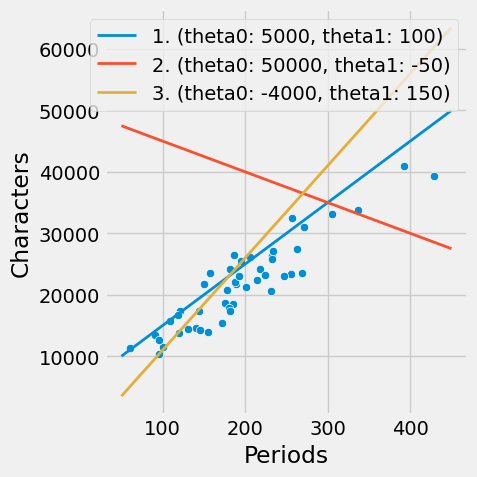

In [5]:

plt.style.use('fivethirtyeight')
lw = pd.read_csv("/Users/jordan.arlan/Documents/DS100/Data/little_women.csv")
fig = plt.figure(figsize = (5, 5))
ax = plt.gca()
sns.scatterplot(data = lw, x = "Periods", y = "Characters", ax = ax)

xlims = np.array([50, 450])
params = [[5000, 100], [50000, -50], [-4000, 150]]
for i, (theta_0, theta_1) in enumerate(params):
    ax.plot(xlims, theta_0 + theta_1 * xlims, lw=2, label=f"{i+1}. (theta0: {theta_0}, theta1: {theta_1})")
ax.legend()

# The best parameters weren't one of the choices
ahat_true, bhat_true = 4745, 87
fig.tight_layout()
plt.savefig('lw_params.png')

In [6]:
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y) * np.mean(x)

# Helper functions
def fit_least_squares(x, y):
    theta_0 = intercept(x, y)
    theta_1 = slope(x, y)
    return theta_0, theta_1

def predict(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

def compute_mse(y, yhat):
    return np.mean((y - yhat) ** 2)

In [7]:
np.mean(lw['Periods']), np.mean(lw['Characters'])

(194.80851063829786, 21688.808510638297)

In [8]:
fig = px.scatter(lw, x = 'Periods', y = 'Characters')
fig.show()

In [9]:
correlation(lw['Periods'], lw['Characters'])

0.9229576895854816

In [10]:
np.corrcoef(lw['Periods'], lw['Characters'])

array([[1.        , 0.92295769],
       [0.92295769, 1.        ]])

In [11]:
lw.corr()

,Characters,Periods
Characters,1.000000,0.922958
Periods,0.922958,1.000000


In [12]:
theta_0 = intercept(lw['Periods'], lw['Characters'])
theta_1 = slope(lw['Periods'], lw['Characters'])

print("predicted y = {} + {} * average number of periods".format(np.round(theta_0, 2), np.round(theta_1, 2)))

predicted y = 4744.78 + 86.98 * average number of periods


In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = lw['Periods'], y = lw['Characters'], mode = 'markers', name = 'actual'))
fig.add_trace(go.Scatter(x = lw['Periods'], y = theta_0 + theta_1 * lw['Periods'], name = 'linear model', line = dict(color = 'red')))


fig.update_layout(xaxis_title = 'Periods', yaxis_title = 'Characters')

In [14]:
plt.style.use('default') # Revert style to default mpl
NO_VIZ, RESID, RESID_SCATTER = range(3)
def least_squares_evaluation(x, y, visualize = NO_VIZ):
    theta_0, theta_1 = fit_least_squares(x, y)
    yhat = predict(x, theta_0, theta_1)
    
    # Statistics Performance metrics
    if visualize == NO_VIZ:
        print(f"x_mean : {np.mean(x):.2f}, y_mean : {np.mean(y):.2f}")
        print(f"x_stdev: {np.std(x):.2f}, y_stdev: {np.std(y):.2f}")
        print(f"r = Correlation(x, y): {correlation(x, y):.3f}")
        print(f"theta_0: {theta_0:.2f}, theta_1: {theta_1:.2f}")
        print(f"RMSE: {np.sqrt(compute_mse(y, yhat)):.3f}")
    
    # Visualization
    fig, axs = None, None
    if visualize == RESID:
        fig = plt.figure(figsize = (4, 3))
        plt.scatter(x, y - yhat, color = 'red')
        plt.axhline(y = 0, xmin = 0, xmax = 500)
        fig.axes[0].set_title("Residuals")
        
        
    if visualize == RESID_SCATTER:
        fig, axs = plt.subplots(1, 2, figsize = (8, 3))
        axs[0].scatter(x, y)
        axs[0].plot(x, yhat)
        axs[0].set_title("LS fit")
        axs[1].scatter(x, y - yhat, color = 'red')
        axs[1].axhline(y = 0, xmin = 0, xmax = 500)

In [15]:
least_squares_evaluation(lw['Periods'], lw['Characters'], visualize = NO_VIZ)

x_mean : 194.81, y_mean : 21688.81
x_stdev: 74.48, y_stdev: 7019.18
r = Correlation(x, y): 0.923
theta_0: 4744.78, theta_1: 86.98
RMSE: 2701.691


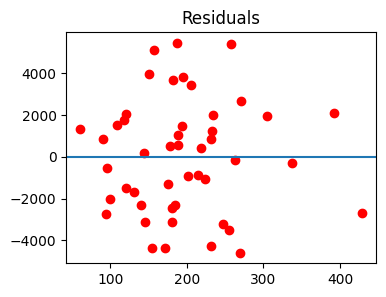

In [16]:
least_squares_evaluation(lw['Periods'], lw['Characters'], visualize = RESID)

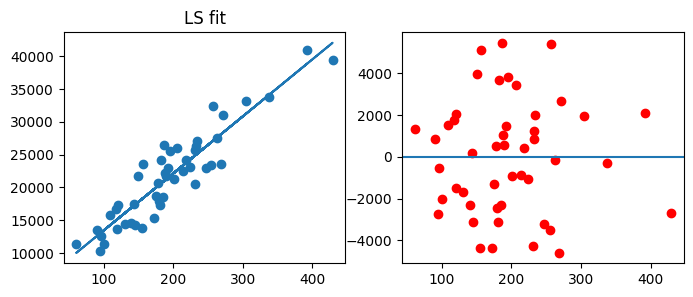

In [17]:
least_squares_evaluation(lw['Periods'], lw['Characters'], visualize = RESID_SCATTER)

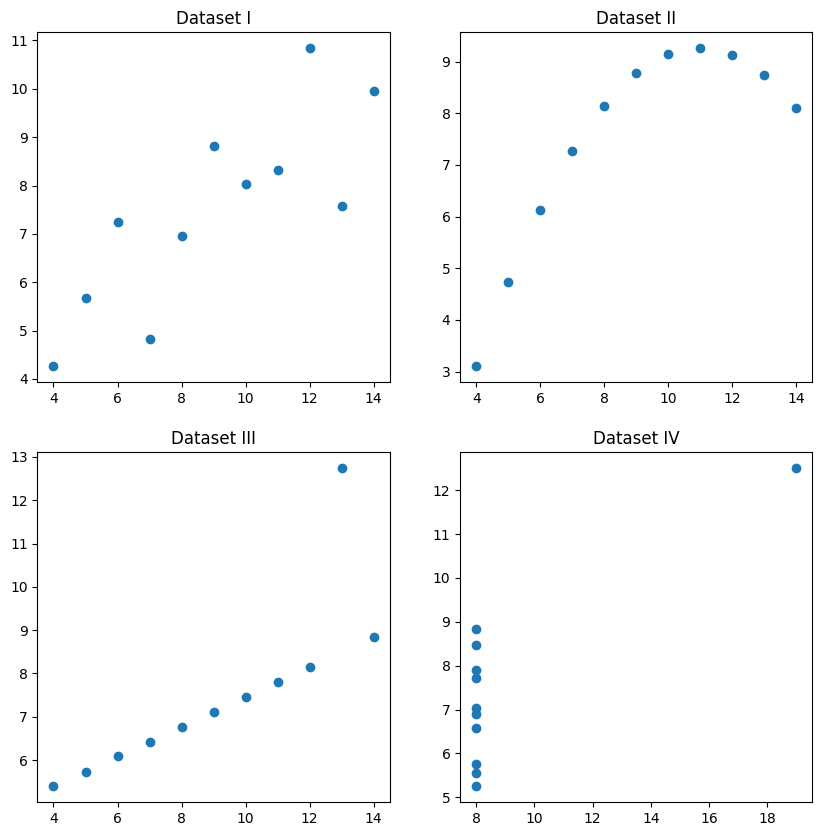

In [18]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

anscombe = {
    'I': pd.DataFrame(list(zip(x, y1)), columns =['x', 'y']),
    'II': pd.DataFrame(list(zip(x, y2)), columns =['x', 'y']),
    'III': pd.DataFrame(list(zip(x, y3)), columns =['x', 'y']),
    'IV': pd.DataFrame(list(zip(x4, y4)), columns =['x', 'y'])
}

fig, axs = plt.subplots(2, 2, figsize = (10, 10))

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    ans = anscombe[dataset]
    axs[i//2, i%2].scatter(ans['x'], ans['y'])
    axs[i//2, i%2].set_title(f"Dataset {dataset}")

plt.show()

In [19]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    least_squares_evaluation(ans['x'], ans['y'], visualize = NO_VIZ)
    print()

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
theta_0: 3.00, theta_1: 0.50
RMSE: 1.119

>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
theta_0: 3.00, theta_1: 0.50
RMSE: 1.119

>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
theta_0: 3.00, theta_1: 0.50
RMSE: 1.118

>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
theta_0: 3.00, theta_1: 0.50
RMSE: 1.118



>>> Dataset I:


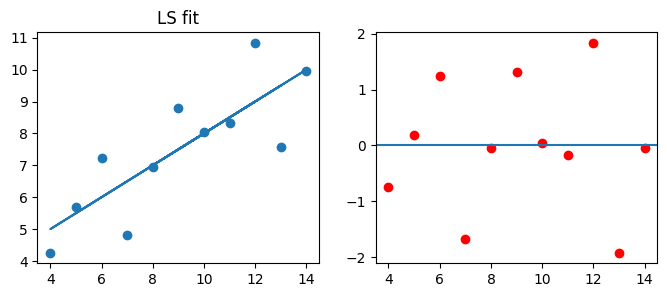



>>> Dataset II:


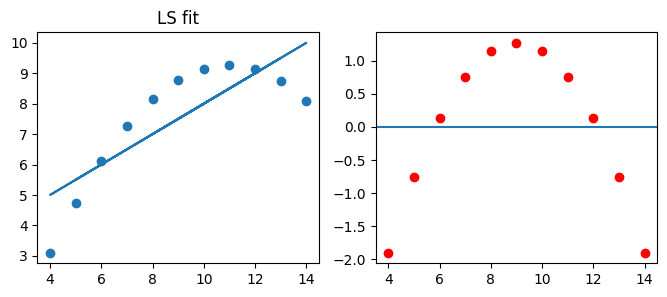



>>> Dataset III:


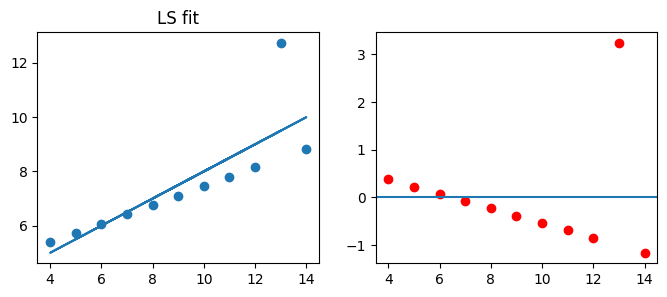



>>> Dataset IV:


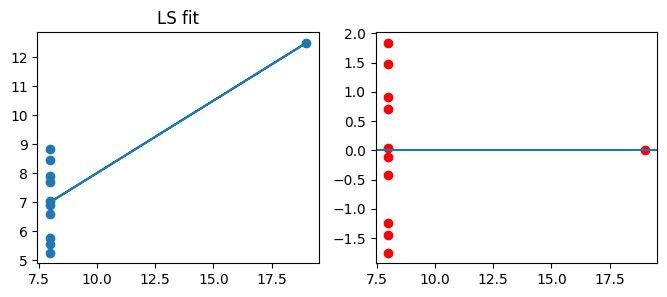

In [20]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = RESID_SCATTER)
    plt.show(fig)
    print()
    print()